# Extracting Text from Image

## *Import Libraries*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from glob import glob
from PIL import Image
from tqdm.notebook import tqdm

plt.style.use('ggplot')

## *Dataset Observasion*

In [2]:
annot = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/annot.parquet')
imgs = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/img.parquet')
train_imgs = glob('../input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/*')

### Plot Example Images

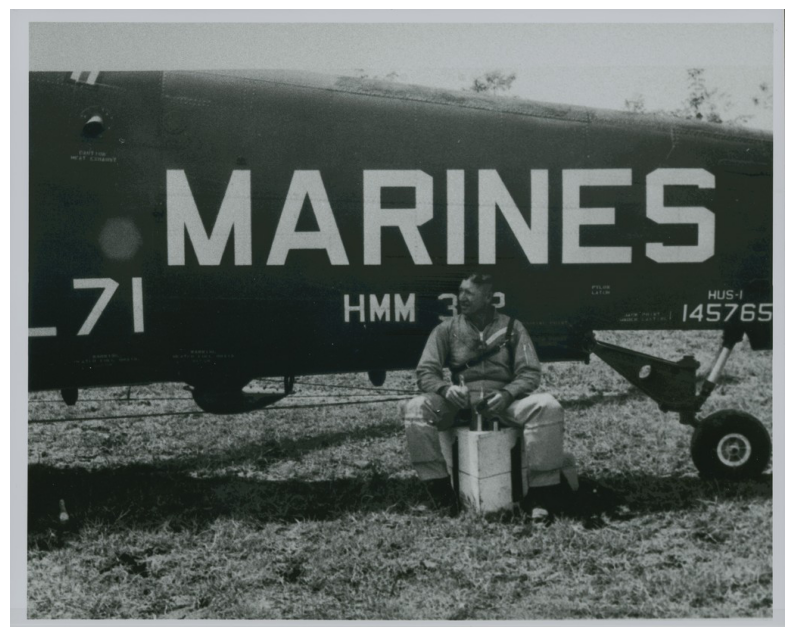

In [3]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(plt.imread(train_imgs[99]))
ax.axis('off')
plt.show()

In [4]:
# See text data in image
img_id = train_imgs[99].split('/')[-1].split('.')[0]
annot.query('image_id == @img_id')

,id,image_id,bbox,utf8_string,points,area
401027,cbd1e9afaa70ca47_1,cbd1e9afaa70ca47,"[199.9, 206.83, 738.33, 137.03]",MARINES,"[199.9, 206.83, 938.23, 206.83, 938.23, 343.86...",101173.36
401028,cbd1e9afaa70ca47_2,cbd1e9afaa70ca47,"[24.09, 417.68, 39.97, 18.79]",.,"[24.09, 418.02, 64.06, 417.68, 64.06, 436.13, ...",751.04
401029,cbd1e9afaa70ca47_3,cbd1e9afaa70ca47,"[79.43, 353.46, 102.82, 80.27]",71,"[79.43, 354.14, 182.25, 353.46, 182.25, 433.73...",8253.36
401030,cbd1e9afaa70ca47_4,cbd1e9afaa70ca47,"[440.03, 373.77, 96.31, 41.68]",HMM,"[440.03, 374.03, 535.82, 373.77, 536.34, 414.9...",4014.20
401031,cbd1e9afaa70ca47_5,cbd1e9afaa70ca47,"[563.65, 374.83, 29.55, 39.28]",3,"[563.65, 374.83, 593.2, 374.83, 593.2, 414.11,...",1160.72
401032,cbd1e9afaa70ca47_6,cbd1e9afaa70ca47,"[634.36, 372.78, 21.01, 24.6]",.,"[634.36, 372.78, 655.37, 372.95, 655.37, 397.2...",516.85
401033,cbd1e9afaa70ca47_7,cbd1e9afaa70ca47,"[767.73, 363.98, 26.13, 6.83]",.,"[767.73, 364.15, 793.86, 363.98, 793.69, 370.8...",178.47
401034,cbd1e9afaa70ca47_8,cbd1e9afaa70ca47,"[767.56, 371.32, 25.79, 6.15]",.,"[767.56, 371.49, 793.35, 371.32, 793.35, 377.4...",158.61
401035,cbd1e9afaa70ca47_9,cbd1e9afaa70ca47,"[921.91, 369.99, 47.43, 15.61]",HUS-1,"[921.91, 370.14, 969.34, 369.99, 969.34, 385.6...",740.38
401036,cbd1e9afaa70ca47_10,cbd1e9afaa70ca47,"[887.71, 387.53, 121.04, 27.36]",145765,"[887.71, 387.53, 1008.75, 387.53, 1008.75, 414...",3311.65


### Display for First 25 Images

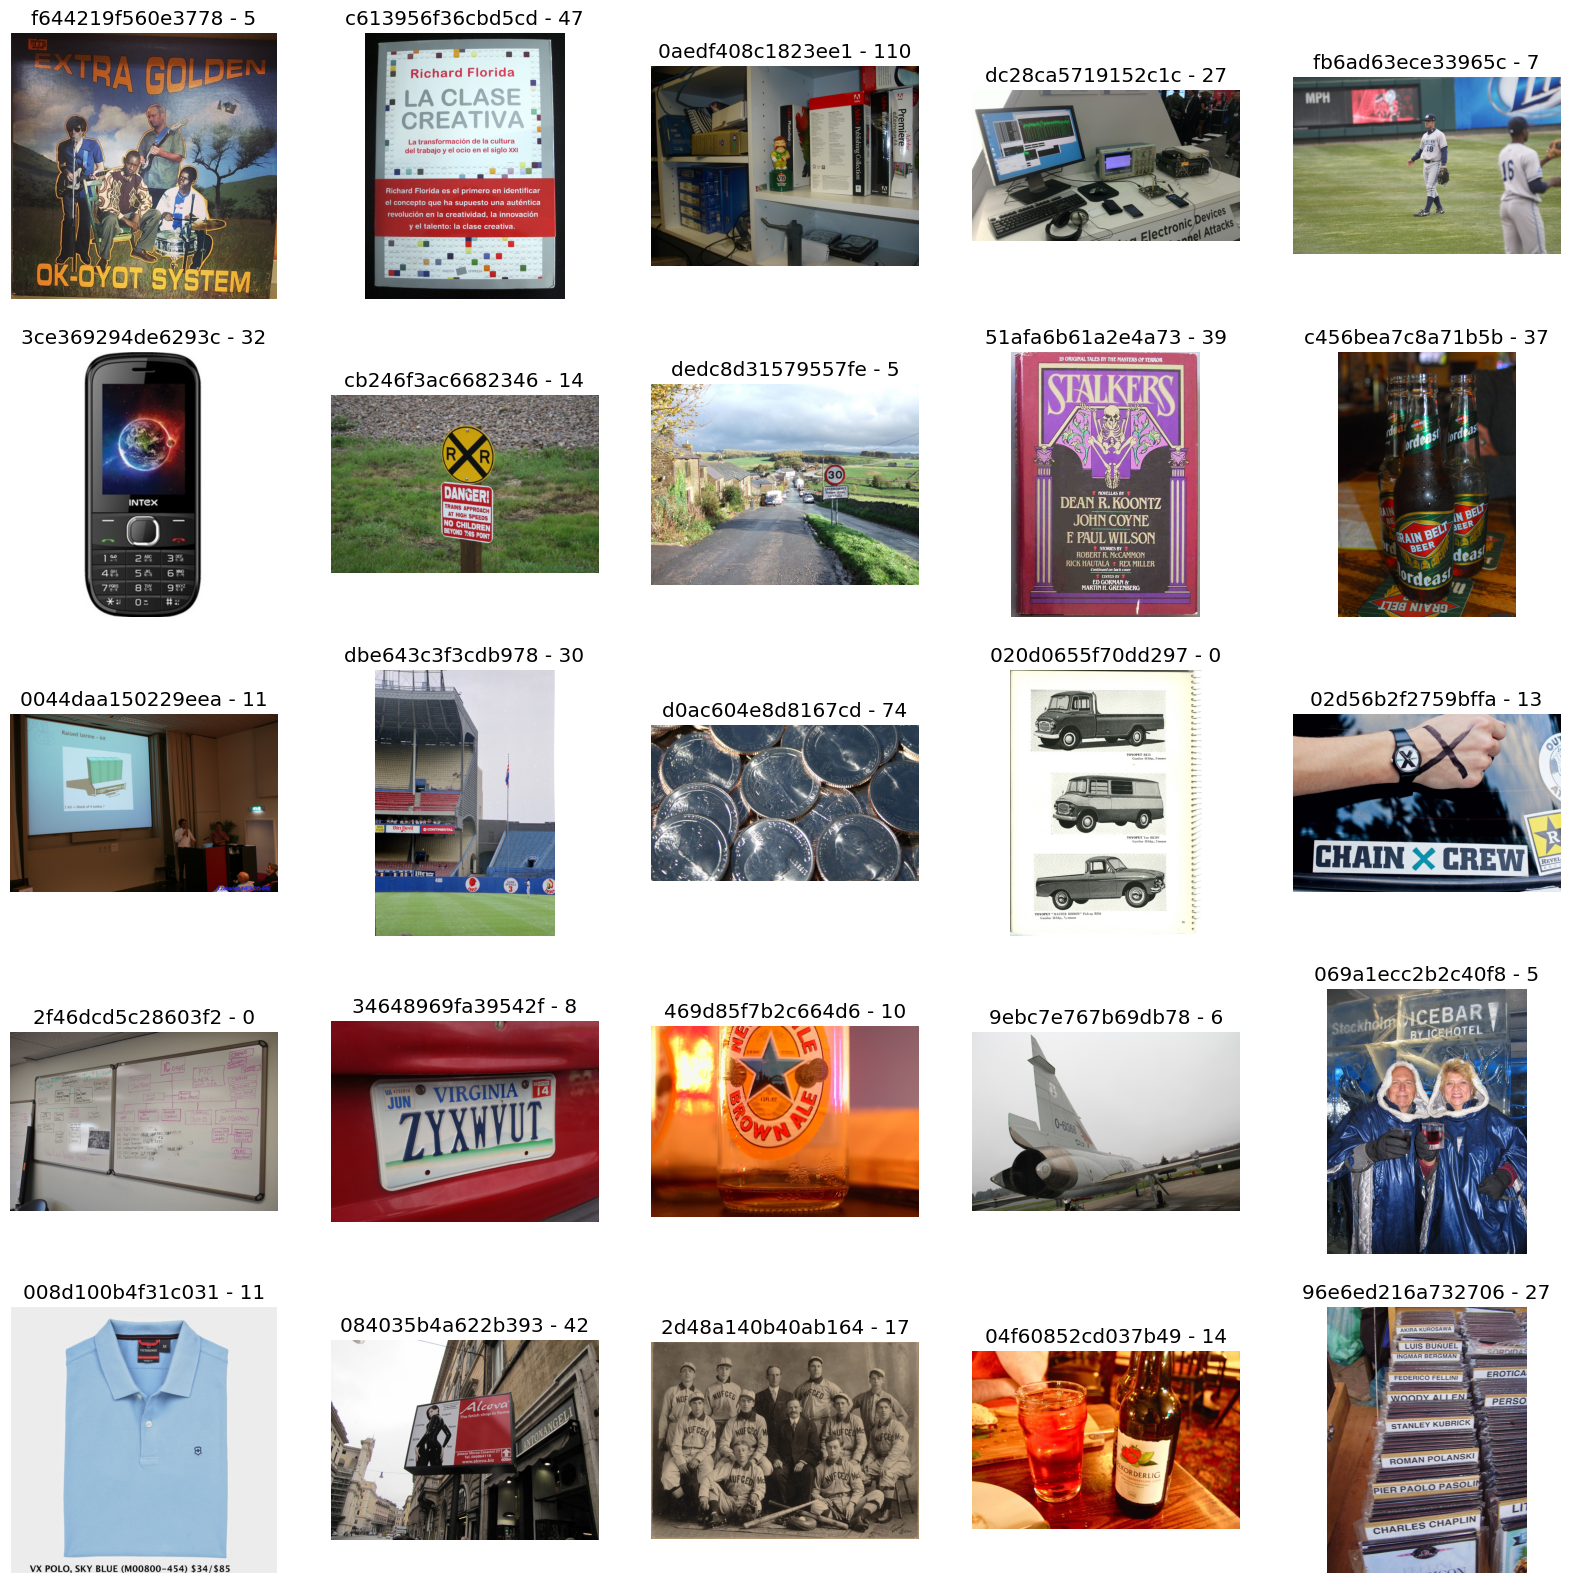

In [5]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(plt.imread(train_imgs[i]))
    axs[i].axis('off')
    img_id = train_imgs[i].split('/')[-1].split('.')[0]
    n_annot = len(annot.query('image_id == @img_id'))
    axs[i].set_title(f'{img_id} - {n_annot}')
plt.show()